# **1. Problem 1A: Single-Year HDI Exploration**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#load the dataset
hdi_df =pd.read_csv('/content/drive/MyDrive/Concept of AI Datasets /Human_Development_Index_Dataset.csv', encoding='latin1')
hdi_df.drop(columns="Unnamed: 0", inplace=True)
#Display first few rows
hdi_df.head()

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


1. Extract Latest Year (2022)

In [73]:
# Identify unique years in the dataset.
hdi_df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [74]:
#Filter the dataset to include only observations from the year 2022.
hdi_2022_df = hdi_df[hdi_df['year'] == 2022]


In [75]:
# Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).
hdi_2022_df.to_csv("hdi_2022_df.csv", index=False)


2. Data Exploration:

In [76]:
# Display the first 10 rows of the 2022 dataset.
hdi_2022_df.head(10)

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [77]:
# Count the number of rows and columns.
hdi_2022_df.shape


(206, 29)

In [78]:
#List all column names and their data types.
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso3                       206 non-null    object 
 1   country                    206 non-null    object 
 2   year                       206 non-null    int64  
 3   hdi                        204 non-null    float64
 4   life_expectancy            206 non-null    float64
 5   pop_millions               206 non-null    float64
 6   hdi_f                      193 non-null    float64
 7   hdi_m                      193 non-null    float64
 8   life_expec_f               206 non-null    float64
 9   life_expec_m               206 non-null    float64
 10  expec_yr_school            205 non-null    float64
 11  expec_yr_school_f          205 non-null    float64
 12  expec_yr_school_m          205 non-null    float64
 13  mean_yr_school             204 non-null    float64
 1

3. Missing Values & Data Cleaning:

In [79]:
# Check for missing values in each column and report total counts.
hdi_2022_df.isnull().sum()


,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0
life_expec_m,0


In [80]:
'''Inspect dataset for:
- numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
'''
hdi_2022_df.duplicated().sum()




np.int64(0)

In [81]:
# Identify non-numeric values in numeric columns
hdi_2022_df[['hdi', 'gross_inc_percap']].apply(pd.to_numeric, errors='coerce').isnull().sum()


,0
hdi,2
gross_inc_percap,2


In [82]:
'''Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).'''

hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(
    hdi_2022_df['gross_inc_percap'], errors='coerce'
)

hdi_2022_df = hdi_2022_df.drop_duplicates()
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])



/tmp/ipython-input-1651503253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
/tmp/ipython-input-1651503253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_2022_df['gross_inc_percap'] = pd.to_numeric(


4. Basic Statistics:

In [83]:
# Compute the mean, median, and standard deviation of HDI for the year 2022.
mean_hdi = hdi_2022_df['hdi'].mean()
print("Mean:\n",mean_hdi)
median_hdi = hdi_2022_df['hdi'].median()
print("Median:\n",median_hdi)
std_hdi = hdi_2022_df['hdi'].std()
print("Standard Deviation:\n",std_hdi)



Mean:
 0.7228872549019609
Median:
 0.7395
Standard Deviation:
 0.15302880386427825


In [84]:
#Identify the country with the highest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]



,5609
country,Switzerland
hdi,0.967


In [85]:
#Identify the country with the lowest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


5. Filtering and Sorting:

In [86]:
#Filter countries with HDI {"hdi"} greater than 0.800.
hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
131,AND,Andorra,2022,0.884,83.552000,0.079824,NaN,NaN,85.838000,81.430000,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
197,ATG,Antigua and Barbuda,2022,0.826,79.236000,0.093763,NaN,NaN,81.645000,76.507000,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064000,45.510318,0.841405,0.845473,79.277000,72.851000,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.080000,71.740000,4.190779,14.451200
296,AUS,Australia,2022,0.946,83.579000,26.177414,0.934602,0.955941,85.453000,81.708000,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.310000,71.130000,14.914763,26.924500
329,AUT,Austria,2022,0.926,82.412000,8.939617,0.911592,0.937756,84.600000,80.150000,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.550000,66.690000,7.399461,27.962100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,GBR,United Kingdom,2022,0.940,82.156000,67.508936,0.926495,0.948878,83.834000,80.439000,...,0.976,0.094,99.800369,99.804909,31.320225,68.679775,59.100000,67.980000,5.164384,18.651400
6170,USA,United States,2022,0.927,78.203000,338.289857,0.927693,0.923405,81.015000,75.479000,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.790000,67.970000,14.932487,29.349800
6203,URY,Uruguay,2022,0.830,78.000000,3.422794,0.831897,0.815520,81.685000,74.147000,...,1.020,0.240,62.529999,59.299999,26.923077,73.076923,55.650000,71.380000,2.364765,11.165400
6467,ZZA.VHHD,Very high human development,2022,0.902,79.309367,1645.245147,0.894830,0.906141,82.289351,76.412574,...,0.988,0.150,87.748692,90.058335,29.286608,70.713392,53.951419,69.361746,9.538905,20.978849


In [87]:
'''Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.'''
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
sorted_df = high_hdi_df.sort_values( by='gross_inc_percap', ascending=False)

In [88]:
#Display the top 10 countries.
sorted_df[['country', 'hdi', 'gross_inc_percap']].head(10)



,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


6. Adding HDI Category Column:

In [89]:
#defining HDI classification function
def hdi_category(hdi):
    if hdi < 0.550:
        return 'Low'
    elif 0.550 <= hdi <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi <= 0.799:
        return 'High'
    else:
        return 'Very High'


In [90]:
#created new column
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(hdi_category)

In [91]:
#verifing the classifiction
hdi_2022_df['HDI_Category'].value_counts()


,count
HDI_Category,
Very High,71
High,54
Medium,44
Low,35


In [92]:
#saving final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


# **2. Problem 1B: HDI Trend Analysis**

1. Data Extraction and Saving:

In [93]:
# Loading dataset
df = pd.read_csv("/content/drive/MyDrive/Concept of AI Datasets /Human_Development_Index_Dataset.csv", encoding='latin1')
df.drop(columns="Unnamed: 0",inplace=True)
# Filter the dataset to include only the years 2020, 2021, and 2022.
df_2020_22 = df[df['year'].isin([2020, 2021, 2022])]

# Save the filtered dataset as HDI problem1B.csv.
df_2020_22.to_csv("HDI_problem1B.csv", index=False)

df_2020_22.head()


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


2. Data Cleaning:

In [94]:
'''Check for missing values in the following essential columns:
– hdi
– country
– year'''

df_2020_22[['country', 'year', 'hdi']].isnull().sum()


,0
country,0
year,0
hdi,8


In [95]:
'''Identify and address the following issues:
– missing or null values,
– inconsistent or misspelled country names,
– duplicate rows,
– numeric columns stored as text or containing non-numeric symbols (e.g., “–”). '''

# Converting HDI to numeric
df_2020_22['hdi'] = pd.to_numeric(df_2020_22['hdi'], errors='coerce')

# Droping missing values
df_2020_22 = df_2020_22.dropna(subset=['country', 'year', 'hdi'])

# Removing duplicates
df_2020_22 = df_2020_22.drop_duplicates()





/tmp/ipython-input-1630948752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_22['hdi'] = pd.to_numeric(df_2020_22['hdi'], errors='coerce')


**3. Visualization Tasks:**

*   A. Line Chart — HDI Trend (Country-Level):







In [96]:
#Select any five countries (or five countries from a region of your choice).
countries = ['Nepal', 'India', 'China', 'Bhutan', 'Pakistan']
trend_df = df_2020_22[df_2020_22['country'].isin(countries)]

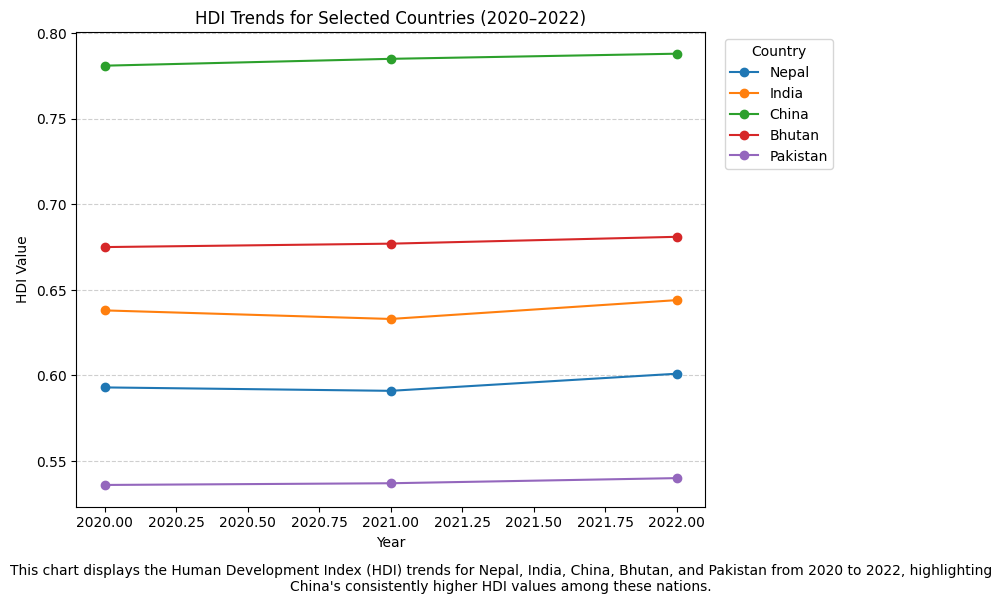

In [97]:
plt.figure(figsize=(10, 6))

for c in countries:
    c_data = trend_df[trend_df['country'] == c]
    plt.plot(c_data['year'], c_data['hdi'], marker='o', label=c)

plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI Value")

plt.legend(
    title="Country",
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Caption below the chart
caption_text = (
    "This chart displays the Human Development Index (HDI) trends for Nepal, India, "
    "China, Bhutan, and Pakistan from 2020 to 2022, highlighting China's consistently "
    "higher HDI values among these nations."
)
plt.figtext(0.5, 0.01, caption_text, ha="center", fontsize=10, wrap=True)

# Adjust layout for legend + caption
plt.tight_layout(rect=[0, 0.05, 0.85, 1])

plt.show()



**B. Generate Visualizations:**

– Bar Chart: Average HDI by Region (2020–2022)








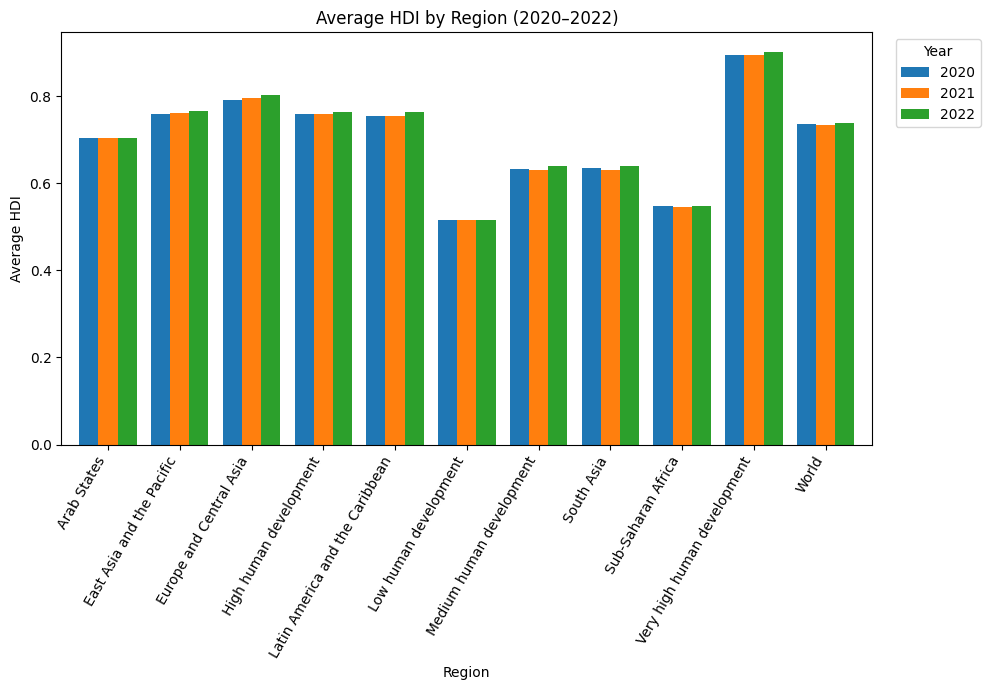

In [98]:
# First, filter for rows where 'iso3' indicates a regional aggregate (typically starting with 'ZZ').
regional_aggregates_df = df_2020_22[df_2020_22['iso3'].str.startswith('ZZ', na=False)]

# Now, group by the 'country' column (which represents the region in these rows) and 'year'
# to calculate the mean HDI.
region_avg = regional_aggregates_df.groupby(['country', 'year'])['hdi'].mean().reset_index()

# For clarity, rename the 'country' column to 'region'.
region_avg = region_avg.rename(columns={'country': 'region'})

plt.figure(figsize=(10, 7))

pivoted_avg = region_avg.pivot(
    index='region',
    columns='year',
    values='hdi'
)

pivoted_avg.plot(kind='bar', ax=plt.gca(), width=0.8)

plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=60, ha='right')

plt.legend(title="Year", loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()


– Box Plot: HDI Distribution for 2020, 2021, and 2022

<Figure size 640x480 with 0 Axes>

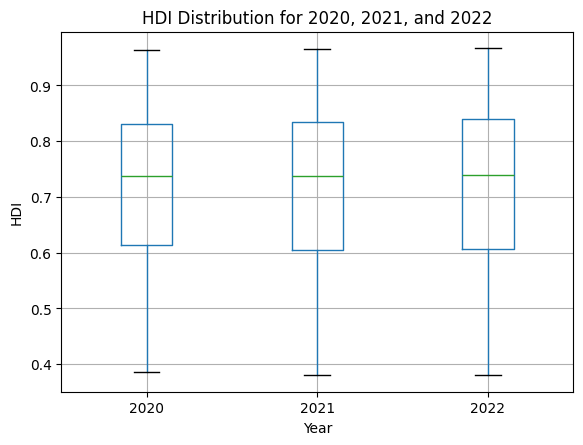

In [99]:
plt.figure()
df_2020_22.boxplot(column='hdi', by='year')
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution for 2020, 2021, and 2022")
plt.suptitle("")
plt.show()


The median HDI value remains consistent at approximately 0.73 across all three years, indicating no noticeable shift in central tendency between 2020 and 2022.
The interquartile range (IQR) is also virtually unchanged, with the middle 50% of HDI values consistently spanning from around 0.61 to 0.83,
 suggesting stable variability over time. Additionally, the overall range of HDI values remains steady,
 with minimum values near 0.38 and maximum values close to 0.96 in each year.

Overall, the box plots indicate that the central tendency, dispersion, and range of global HDI values remained highly stable throughout the 2020–2022 period.

– Scatter Plot: HDI vs. GNI per Capita

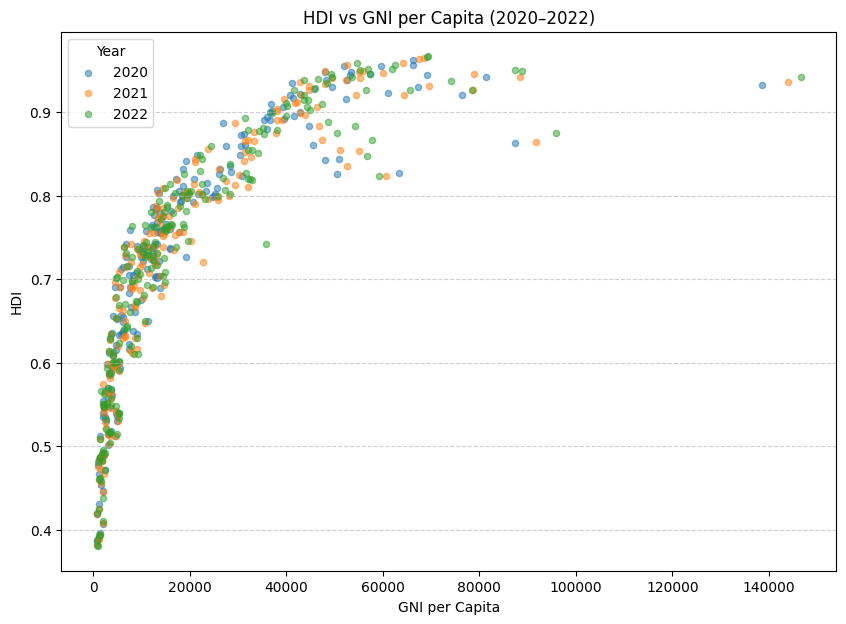

In [100]:
if 'gross_inc_percap' in df_2020_22.columns:
    df_2020_22['gross_inc_percap'] = pd.to_numeric(
        df_2020_22['gross_inc_percap'], errors='coerce'
    )

    scatter_df = df_2020_22.dropna(subset=['gross_inc_percap'])

    plt.figure(figsize=(10, 7))
    for year in sorted(scatter_df['year'].unique()):
        year_data = scatter_df[scatter_df['year'] == year]
        plt.scatter(year_data['gross_inc_percap'], year_data['hdi'], alpha=0.5, s=20, label=str(year))
    plt.grid(True, axis='y', linestyle='--', alpha=0.6, zorder=0)
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.legend(title="Year")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")

The scatter plot illustrates a strong positive correlation between GNI per capita and HDI from 2020 to 2022. It reveals diminishing returns: HDI increases rapidly at lower incomes but plateaus at higher GNI levels. While there's a general trend, some countries show variations in converting economic wealth to human development. The consistent overlap of data points across the three years indicates a stable relationship during this period.

4. Short Analysis Questions:









A) Which countries show the greatest improvement in HDI from 2020 to 2022?
- If we see the dataset, the greatest improvement in HDI are generally seen in lower and middle-HDI  countries , if we talk
precisely countries like Bangladesh, Nepal, rwanda, India, Combodia top improvers.
   


B) Did any countries experience a decline in HDI? Provide possible reasons.
 - Yes, some conflict affected countries(eg Afghanistan),heavily tourism depentend countries and countries with long school closures  experienced a decline in  HDI. some of major reasons behind this decline are covid-19 related mortality , political instability and conflict insde the country etc.

C) Which region has the highest and lowest average HDI across these three years?
  - Europe and central Asia has the higest average HDI across these three years and Sub-Saharan Africa has the lowest average HDI across these three years


D) Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.
- The COVID-19 pandemic had a clear negative impact on global HDI, especially in 2020 and 2021.Life expectancy declined in many countries due to excess mortality.Education disruption from school closures reduced expected years of schooling. Income losses lowered GNI per capita

# **Problem 2: Advanced HDI Exploration**

1. Create South Asia Subset:

In [101]:
# Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Concept of AI Datasets /Human_Development_Index_Dataset.csv', encoding='latin1')
df.drop(columns="Unnamed: 0", inplace=True)

In [102]:
df_latest = df.sort_values("year").groupby("country").tail(1)

In [103]:
'''Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]. '''
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]



In [104]:
#Filter the HDI dataset to include only these countries.
sa_df = df_latest[df_latest["country"].isin(south_asia)].copy()

In [105]:
# Save filtered dataset
sa_df.to_csv("HDI_SouthAsia.csv", index=False)

In [106]:
sa_df.head(10)

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3530,MDV,Maldives,2022,0.762,80.839,0.523787,0.748233,0.767001,81.844,80.065,...,0.976,0.328,46.928068,46.269366,4.597701,95.402299,53.34,78.21,3.299409,NaN
2573,IND,India,2022,0.644,67.744,1417.173173,0.582117,0.683510,69.384,66.257,...,0.852,0.437,40.959240,58.663429,14.634146,85.365854,28.26,76.14,1.899894,4.7841
4091,NPL,Nepal,2022,0.601,70.484,30.547580,0.562283,0.635119,72.364,68.608,...,0.885,0.495,25.972874,42.779256,33.832335,66.167665,27.91,54.95,0.520340,8.4528
4388,PAK,Pakistan,2022,0.540,66.431,235.824862,0.479545,0.574878,68.918,64.134,...,0.834,0.522,22.044215,26.875011,20.135747,79.864253,24.53,80.67,0.965639,4.2447
5477,LKA,Sri Lanka,2022,0.780,76.610,21.832143,0.750765,0.792700,80.230,72.851,...,0.947,0.376,80.645348,83.286453,5.333333,94.666667,29.68,70.69,0.924002,4.9743
659,BTN,Bhutan,2022,0.681,72.229,0.782455,0.669680,0.690410,74.152,70.570,...,0.970,0.334,26.681771,34.252853,15.714286,84.285714,53.48,73.45,1.366198,24.7398
461,BGD,Bangladesh,2022,0.670,73.698,171.186373,0.634605,0.694223,76.012,71.514,...,0.914,0.498,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6457
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809


**2. Composite Development Score:**

In [107]:
'''Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap" '''

sa_df["Composite_Score"] = (
    0.30 *sa_df["life_expectancy"] +
    0.30 * sa_df["gross_inc_percap"] )


In [108]:
#Rank South Asian countries based on Composite Score


composite_rank = (
    sa_df
    .groupby("country", as_index=False)["Composite_Score"]
    .mean()
)
composite_rank = composite_rank.sort_values(
    "Composite_Score", ascending=False)

HDI_rank=(
    sa_df.groupby("country", as_index=False)["hdi"]
    .mean()
)

HDI_rank=HDI_rank.sort_values(
       "hdi", ascending=False)


print("\nComposite Score Ranking:\n")
print(composite_rank[["country", "Composite_Score"]])


Composite Score Ranking:

       country  Composite_Score
4     Maldives      5678.289357
7    Sri Lanka      3592.832541
2       Bhutan      3209.130864
3        India      2105.481239
1   Bangladesh      1975.446053
6     Pakistan      1632.210427
5        Nepal      1228.811605
0  Afghanistan       419.425420


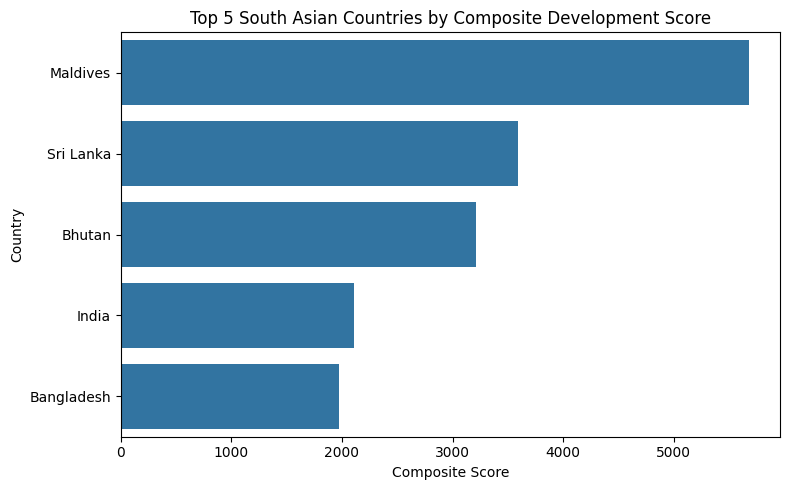

In [109]:
#Plot the top 5 countries in a horizontal bar chart.
plt.figure(figsize=(8,5))
sns.barplot(
    data=composite_rank.head(5),
    x="Composite_Score",
    y="country"
)
plt.title("Top 5 South Asian Countries by Composite Development Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [110]:
print("\nComposite Score Ranking:\n")
print(composite_rank[["country", "Composite_Score"]])
print("\nHDI Ranking:\n")
print(HDI_rank[["country", "hdi"]])


Composite Score Ranking:

       country  Composite_Score
4     Maldives      5678.289357
7    Sri Lanka      3592.832541
2       Bhutan      3209.130864
3        India      2105.481239
1   Bangladesh      1975.446053
6     Pakistan      1632.210427
5        Nepal      1228.811605
0  Afghanistan       419.425420

HDI Ranking:

       country    hdi
7    Sri Lanka  0.780
4     Maldives  0.762
2       Bhutan  0.681
1   Bangladesh  0.670
3        India  0.644
5        Nepal  0.601
6     Pakistan  0.540
0  Afghanistan  0.462


The general order of countries based on Composite Score and HDI is largely stable, though there are notable discrepancies. The Maldives and Sri Lanka, the top two nations, exchange their leading ranks based on the metric applied. Bhutan exhibits the most significant negative shift, dropping from 3rd in the Composite Score to 6th in the HDI ranking. In contrast, Pakistan shows the greatest relative enhancement, rising two positions with the Composite Score. Other nations such as India, Bangladesh, and Nepal hold comparable positions in both rankings

**3. Outlier Detection:**

In [111]:
# Calculate IQR for GNI per Capita
Q1 = sa_df["gross_inc_percap"].quantile(0.25)
Q3 = sa_df["gross_inc_percap"].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = sa_df[
    (sa_df["gross_inc_percap"] < Q1 - 1.5 * IQR) |
    (sa_df["gross_inc_percap"] > Q3 + 1.5 * IQR)
]

outliers[["country", "gross_inc_percap", "hdi"]]


,country,gross_inc_percap,hdi


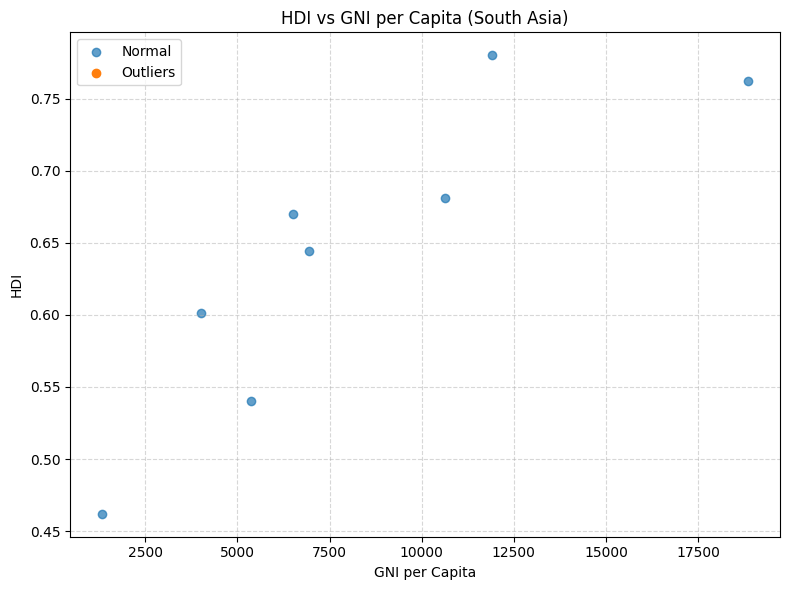

In [112]:
#Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.

plt.figure(figsize=(8, 6))

# Normal points
plt.scatter(
    sa_df["gross_inc_percap"],
    sa_df["hdi"],
    label="Normal",
    alpha=0.7
)

# Outliers
plt.scatter(
    outliers["gross_inc_percap"],
    outliers["hdi"],
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**4. Exploring Metric Relationships:**





Correlation (Gender Development vs HDI): 0.885
Correlation (Life Expectancy vs HDI): 0.928


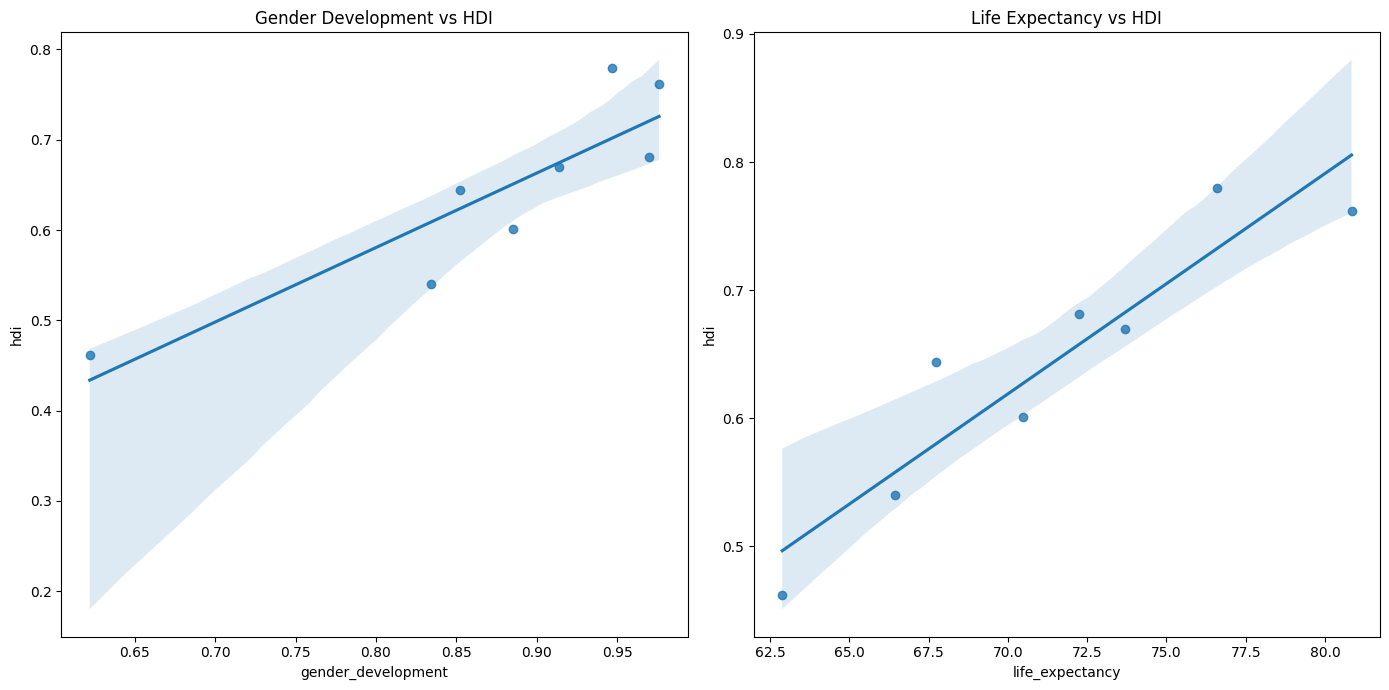

In [113]:
""" Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"})

Compute Pearson correlation of each metric with HDI
"""
corr_gender = sa_df["gender_development"].corr(sa_df["hdi"])
corr_life = sa_df["life_expectancy"].corr(sa_df["hdi"])

print("Correlation (Gender Development vs HDI):", round(corr_gender, 3))
print("Correlation (Life Expectancy vs HDI):", round(corr_life, 3))

#Create scatter plots with trendlines to visualize the relationships.
plt.figure(figsize=(14, 7))

# Gender Development vs HDI
plt.subplot(1, 2, 1)
sns.regplot(
    x="gender_development",
    y="hdi",
    data=sa_df
)
plt.title("Gender Development vs HDI")

# Life Expectancy vs HDI
plt.subplot(1, 2, 2)
sns.regplot(
    x="life_expectancy",
    y="hdi",
    data=sa_df
)
plt.title("Life Expectancy vs HDI")

plt.tight_layout()
plt.show()





Discuss:

 a) Which metric is most strongly related to HDI
and shows the weakest relationship with HDI.
- From the two given metric, Life Expectancy is most strongly related to the HDI, while Gender Development shows the weakest relationship with the HDI.

- The correlation coefficient for Life Expectancy vs. HDI is 0.928, which is closer to 1, indicating a very strong positive linear relationship. The correlation coefficient for Gender Development vs. HDI is 0.885, which is lower than the life expectancy figure, indicating a weaker (though still strong) relationship between the two metrics.



**5. Gap Analysis:**

In [114]:
""" Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi" """

sa_df["GNI_HDI_Gap"] = sa_df["gross_inc_percap"] - sa_df["hdi"]


In [115]:
#Rank South Asian countries by GNI HDI Gap in descending and ascending order.
gap_desc = sa_df.sort_values("GNI_HDI_Gap", ascending=False)
gap_asc = sa_df.sort_values("GNI_HDI_Gap")

print("\nSouth Asian Countries by GNI HDI Gap (Descending):\n")
print(gap_desc[["year","country", "GNI_HDI_Gap"]])

print("\nSouth Asian Countries by GNI HDI Gap (Ascending):\n")
print(gap_asc[["year","country", "GNI_HDI_Gap"]])




South Asian Countries by GNI HDI Gap (Descending):

      year      country   GNI_HDI_Gap
3530  2022     Maldives  18846.030190
5477  2022    Sri Lanka  11898.718470
659   2022       Bhutan  10624.192880
2573  2022        India   6949.882798
461   2022   Bangladesh   6510.452178
4388  2022     Pakistan   5373.730423
4091  2022        Nepal   4024.953685
32    2022  Afghanistan   1334.743733

South Asian Countries by GNI HDI Gap (Ascending):

      year      country   GNI_HDI_Gap
32    2022  Afghanistan   1334.743733
4091  2022        Nepal   4024.953685
4388  2022     Pakistan   5373.730423
461   2022   Bangladesh   6510.452178
2573  2022        India   6949.882798
659   2022       Bhutan  10624.192880
5477  2022    Sri Lanka  11898.718470
3530  2022     Maldives  18846.030190


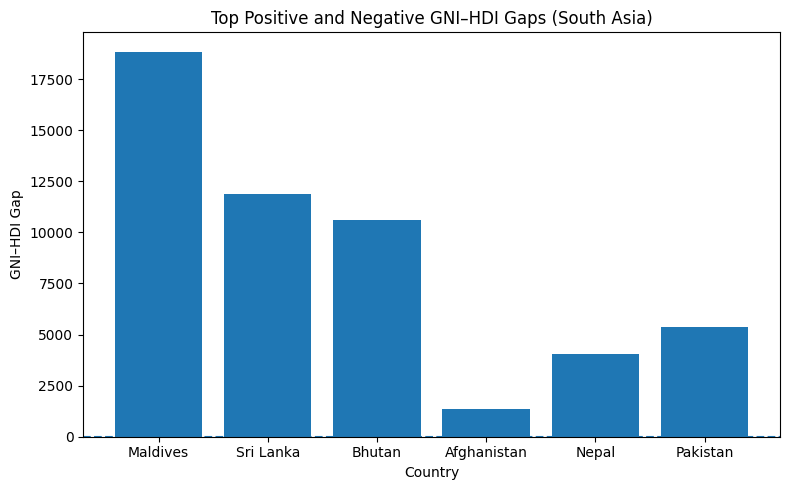

In [116]:
#Plot the top 3 positive gaps and top 3 negative gaps
gap_plot = pd.concat([gap_desc.head(3), gap_asc.head(3)])

plt.figure(figsize=(8, 5))
plt.bar(gap_plot["country"], gap_plot["GNI_HDI_Gap"])
plt.axhline(0, linestyle="--")
plt.xlabel("Country")
plt.ylabel("GNI–HDI Gap")
plt.title("Top Positive and Negative GNI–HDI Gaps (South Asia)")
plt.tight_layout()
plt.show()


A notable GNI-HDI disparity suggests that a country's wealth is not effectively converting into better human development results such as health and education.

This gap frequently indicates significant income disparity or inadequate funding for essential public services.

The gap underscores policy issues, prompting an inquiry into why a prosperous nation has not improved the general living standards of its people.

The Maldives, for instance, exhibits the most significant disparity, indicating possible problems with wealth distribution even though it has a high GNI per capita.

In contrast, Afghanistan exhibits the narrowest gap, indicating a tighter correlation between its low GNI and human development results.


# **Problem 3 – Comparative Regional Analysis**

**1. Create Middle East Subset:**

In [117]:
# define list of south asia and middle east

south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [118]:
#Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia andMiddle East.
Problem_1B=pd.read_csv('HDI_problem1B.csv')
df_south_asia = Problem_1B[Problem_1B["country"].isin(south_asia)]
df_middle_east = Problem_1B[Problem_1B["country"].isin(middle_east)]

In [119]:
# Display unique countries and shapes of the regional dataframes.
print("South Asia countries:", df_south_asia["country"].unique())
print("Middle East countries:", df_middle_east["country"].unique())

print("South Asia shape:", df_south_asia.shape)
print("Middle East shape:", df_middle_east.shape)

South Asia countries: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']
Middle East countries: ['Bahrain' 'Iraq' 'Israel' 'Jordan' 'Kuwait' 'Lebanon' 'Oman' 'Qatar'
 'Saudi Arabia' 'United Arab Emirates' 'Yemen']
South Asia shape: (24, 29)
Middle East shape: (33, 29)


In [120]:
# Save the filtered South Asia and Middle East datasets to CSV files.
df_south_asia.to_csv('HDI_SouthAsia_2020_2022.csv' ,index=False)
df_middle_east.to_csv('HDI_MiddleEast_2020_2022.csv', index = False)

2. Descriptive Statistics:

In [121]:
"""Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022. """
south_asia_mean, sa_std = df_south_asia["hdi"].mean(), df_south_asia["hdi"].std()
middle_east_mean, me_std = df_middle_east["hdi"].mean(), df_middle_east["hdi"].std()

print(f"South Asia → Mean HDI: {south_asia_mean:.3f}, Std: {sa_std:.3f}")
print(f"Middle East → Mean HDI: {middle_east_mean:.3f}, Std: {me_std:.3f}")

South Asia → Mean HDI: 0.640, Std: 0.098
Middle East → Mean HDI: 0.789, Std: 0.141


The Middle East region performs better on average in terms of Human Development Index (HDI).

**3. Top and Bottom Performers:**

In [122]:
#compute country-wise averages
sa_avg = df_south_asia.groupby("country", as_index=False)["hdi"].mean()
me_avg = df_middle_east.groupby("country", as_index=False)["hdi"].mean()

In [123]:
#Identify the top 3 and bottom 3 countries in each region based on HDI
sa_top = sa_avg.sort_values("hdi", ascending=False).head(3)
sa_bottom = sa_avg.sort_values("hdi").head(3)

me_top = me_avg.sort_values("hdi", ascending=False).head(3)
me_bottom = me_avg.sort_values("hdi").head(3)


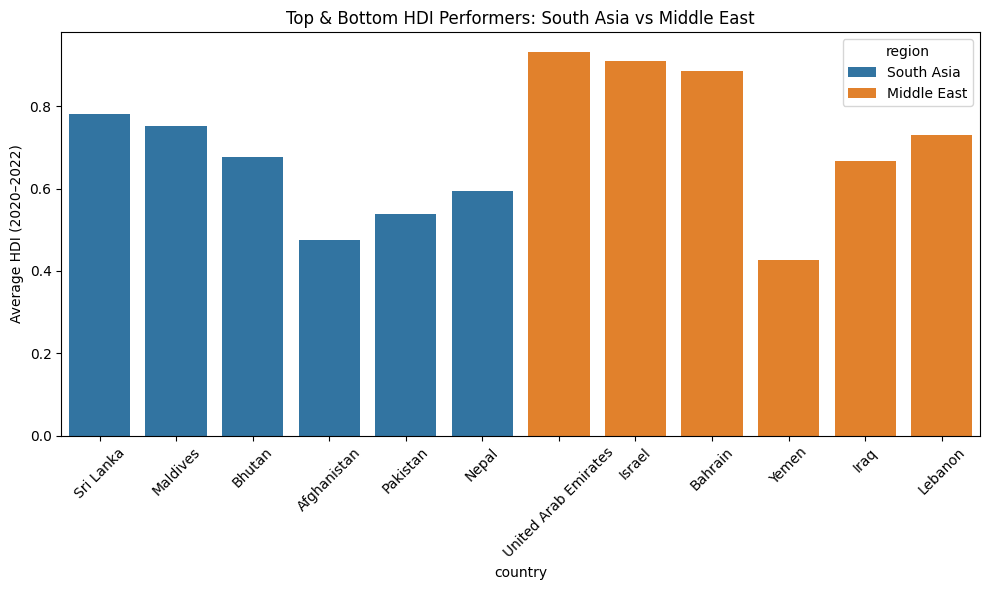

In [124]:
#Create a bar chart comparing these top and bottom performers across the two regions.

compare_df = pd.concat([
    sa_top.assign(region="South Asia"),
    sa_bottom.assign(region="South Asia"),
    me_top.assign(region="Middle East"),
    me_bottom.assign(region="Middle East")
])

plt.figure(figsize=(10, 6))
sns.barplot(data=compare_df, x="country", y="hdi", hue="region")
plt.xticks(rotation=45)
plt.ylabel("Average HDI (2020–2022)")
plt.title("Top & Bottom HDI Performers: South Asia vs Middle East")
plt.tight_layout()
plt.show()


The bar chart shows the Average HDI (2020-2022) for a range of leading and lagging performers in South Asia and the Middle East. In general, the Middle East displays a notably greater degree of human development than South Asia. The dataset shows that the United Arab Emirates and Israel are the highest-performing nations, with each obtaining an average HDI score exceeding 0.85. In contrast, Afghanistan and Yemen have the lowest HDI values among the countries listed, each scoring under 0.5. Sri Lanka is the top performer in South Asia, achieving an HDI score slightly below 0.8


**4. Metric Comparisons:**

In [125]:
""" Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"} """

from sklearn.preprocessing import MinMaxScaler
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]
south_asia_means = df_south_asia[metrics].mean()
middle_east_means = df_middle_east[metrics].mean()
metric_comparison = pd.DataFrame({
    "South Asia": south_asia_means,
    "Middle East": middle_east_means
})
metric_comparison



,South Asia,Middle East
gender_development,0.881458,0.896545
life_expectancy,70.970083,75.855455
gross_inc_percap,7766.509931,37750.770520


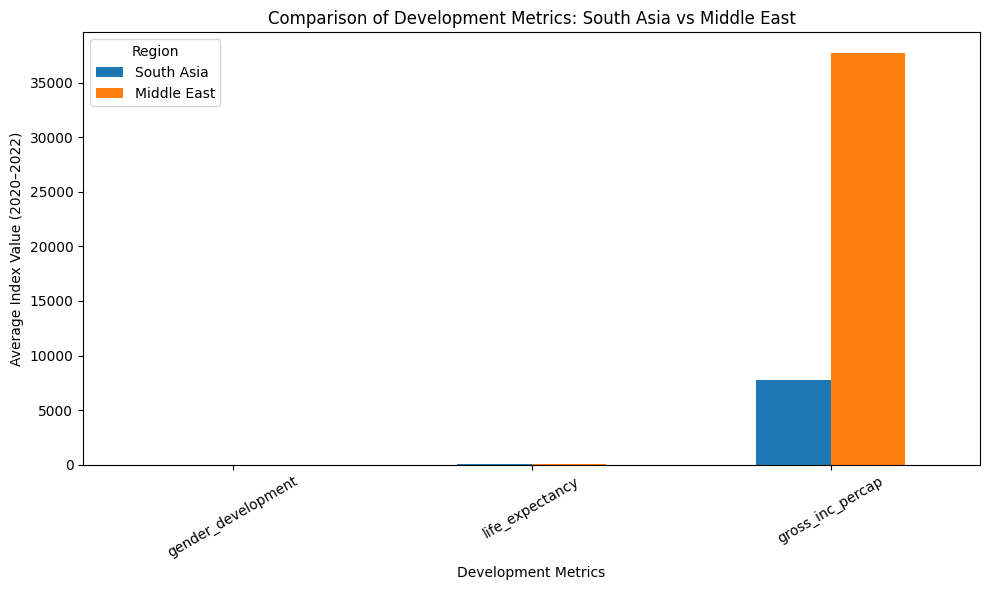

In [126]:
metric_comparison.plot(kind="bar",figsize=(10,6))
plt.ylabel("Average Index Value (2020–2022)")
plt.xlabel("Development Metrics")
plt.title("Comparison of Development Metrics: South Asia vs Middle East")
plt.xticks(rotation=30)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

The metric that shows the greatest disparity between the South Asia and Middle East regions is Gross Income Per Capita (gross_inc_percap).


**5. HDI Disparity:**

In [127]:
#Compute the range (max – min) of HDI for each region

sa_range = df_south_asia["hdi"].max() - df_south_asia["hdi"].min()
me_range = df_middle_east["hdi"].max() - df_middle_east["hdi"].min()

print("the range for SA region is", sa_range)
print("the range for ME region is", me_range)

the range for SA region is 0.321
the range for ME region is 0.5130000000000001


In [128]:
#Compute the coefficient of variation (CV = std/mean) for HDI

middle_east_mean=df_middle_east['hdi'].mean()
south_asia_mean=df_south_asia['hdi'].mean()

middle_east_std=df_middle_east['hdi'].std()
south_asia_std=df_south_asia['hdi'].std()

middle_east_CV=(middle_east_std/middle_east_mean)
south_asia_CV=(south_asia_std/south_asia_mean)

print(" the cv of middle east is ", middle_east_CV)
print(" the cv of south asia is ", south_asia_CV)

if south_asia_CV > middle_east_CV:
    more_variation = "South Asia"
else:
    more_variation = "Middle East"
print("Region with the more varition in HDI :",more_variation)

 the cv of middle east is  0.17910145193048382
 the cv of south asia is  0.1536520924690084
Region with the more varition in HDI : Middle East


**6. Correlation Analysis:**

In [129]:
# • For each region, compute correlations of HDI with:
# – Gender Development Index
# – Life Expectancy Index

# South Asia
sa_corr_gender = df_south_asia["hdi"].corr(df_south_asia["gender_development"])
sa_corr_life = df_south_asia["hdi"].corr(df_south_asia["life_expectancy"])

# Middle East
me_corr_gender = df_middle_east["hdi"].corr(df_middle_east["gender_development"])
me_corr_life = df_middle_east["hdi"].corr(df_middle_east["life_expectancy"])

print("South Asia: HDI–Gender =", round(sa_corr_gender,3))
print("South Asia: HDI–Life =", round(sa_corr_life,3))
print("Middle East: HDI–Gender =", round(me_corr_gender,3))
print("Middle East: HDI–Life =", round(me_corr_life,3))


South Asia: HDI–Gender = 0.874
South Asia: HDI–Life = 0.939
Middle East: HDI–Gender = 0.936
Middle East: HDI–Life = 0.933


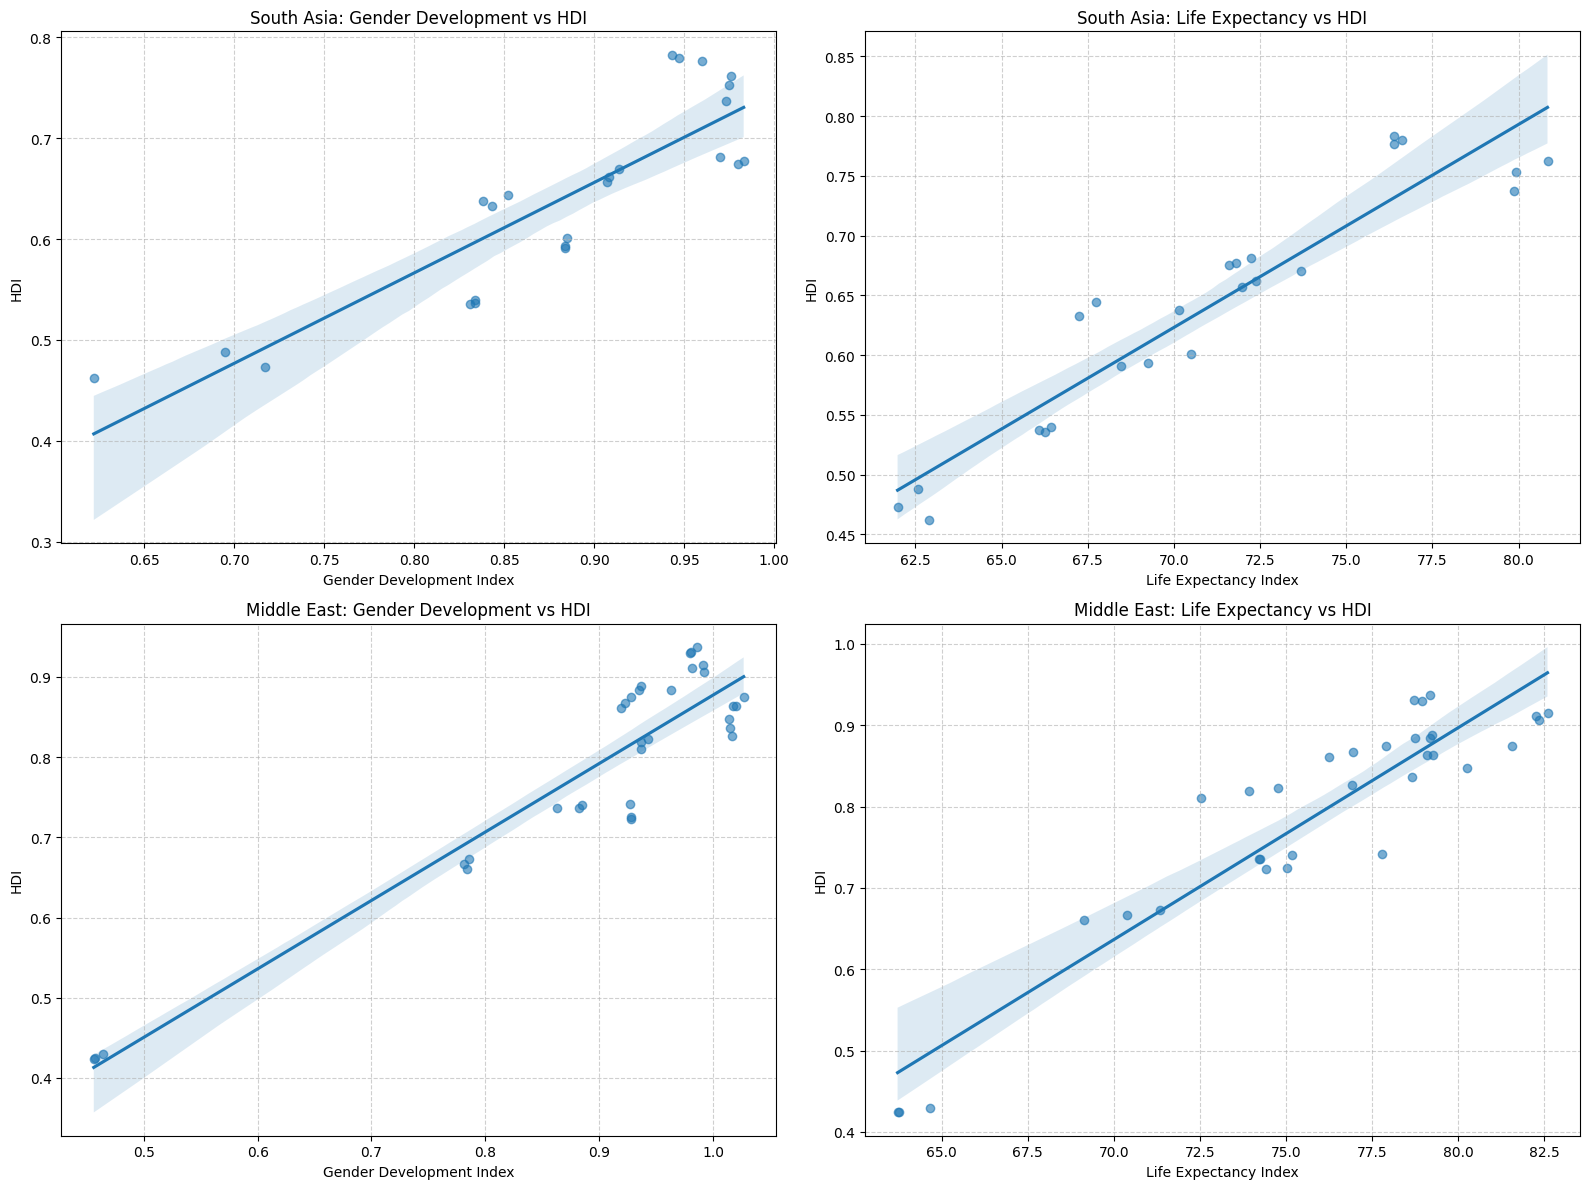

In [130]:
#Create scatter plots with trendlines for each correlation.
plt.figure(figsize=(16, 12))

# South Asia: Gender Development vs HDI
plt.subplot(2, 2, 1)
sns.regplot(x='gender_development', y='hdi', data=df_south_asia, scatter_kws={'alpha':0.6})
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('South Asia: Gender Development vs HDI')
plt.grid(True, linestyle='--', alpha=0.6)

# South Asia: Life Expectancy vs HDI
plt.subplot(2, 2, 2)
sns.regplot(x='life_expectancy', y='hdi', data=df_south_asia, scatter_kws={'alpha':0.6})
plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.title('South Asia: Life Expectancy vs HDI')
plt.grid(True, linestyle='--', alpha=0.6)

# Middle East: Gender Development vs HDI
plt.subplot(2, 2, 3)
sns.regplot(x='gender_development', y='hdi', data=df_middle_east, scatter_kws={'alpha':0.6})
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.title('Middle East: Gender Development vs HDI')
plt.grid(True, linestyle='--', alpha=0.6)

# Middle East: Life Expectancy vs HDI
plt.subplot(2, 2, 4)
sns.regplot(x='life_expectancy', y='hdi', data=df_middle_east, scatter_kws={'alpha':0.6})
plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.title('Middle East: Life Expectancy vs HDI')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**7. Outlier Detection:**

In [131]:
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

sa_outliers = find_outliers(df_south_asia, "gross_inc_percap")
me_outliers = find_outliers(df_south_asia, "gross_inc_percap")


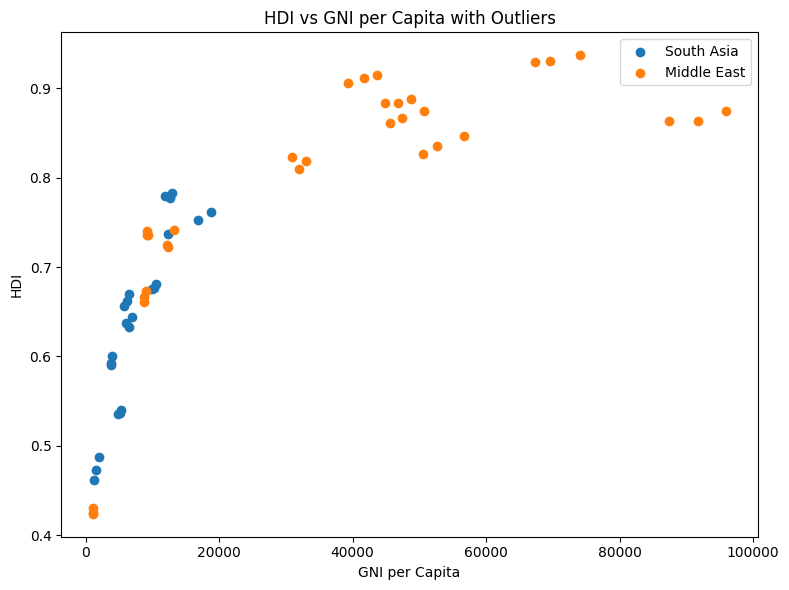

In [132]:
plt.figure(figsize=(8,6))

plt.scatter(df_south_asia["gross_inc_percap"], df_south_asia["hdi"], label="South Asia")
plt.scatter(df_middle_east["gross_inc_percap"], df_middle_east["hdi"], label="Middle East")

plt.scatter(sa_outliers["gross_inc_percap"], sa_outliers["hdi"], s=80)
plt.scatter(me_outliers["gross_inc_percap"], me_outliers["hdi"], s=80)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita with Outliers")
plt.legend()
plt.tight_layout()
plt.show()
